# PRAKTIKUM 1 - Klasifikasi kucing dan anjing

#### NAMA     : AHMED FATHIR SYAFAAT
#### KELAS    : TI - 3H
#### NIM      : 2241720083

#### Langkah 1 - Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Langkah 2 - Pra Pengolahan Data

##### Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


##### Langkah 2.2. Pra Pengolahan Data Testing

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


#### Langkah 3 - Pembuatan Model CNN

##### Langkah 3.1.  - Inisiasi Model CNN

In [5]:
cnn = tf.keras.models.Sequential()

#### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

c:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Langkah 3.3 - Pembuatan Layer Pooling 1

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

##### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

##### Langkah 3.5 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

##### Langkah 3.6 - Fully Connected Layer 1 (Input)


In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

##### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##### Langkah 3.8 - Compile Model CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Langkah 4 - Fit CNN

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

c:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.5388 - loss: 0.6994

c:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 173s 674ms/step - accuracy: 0.5389 - loss: 0.6993 - val_accuracy: 0.6725 - val_loss: 0.6083
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 239ms/step - accuracy: 0.6474 - loss: 0.6254 - val_accuracy: 0.6955 - val_loss: 0.5883
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 237ms/step - accuracy: 0.7052 - loss: 0.5722 - val_accuracy: 0.7165 - val_loss: 0.5835
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 237ms/step - accuracy: 0.7351 - loss: 0.5256 - val_accuracy: 0.7355 - val_loss: 0.5247
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 237ms/step - accuracy: 0.7550 - loss: 0.5020 - val_accuracy: 0.7445 - val_loss: 0.5443
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 237ms/step - accuracy: 0.7608 - loss: 0.4829 - val_accuracy: 0.7675 - val_loss: 0.4923
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - accuracy: 0.7863 - loss: 0.4607 - val_accuracy: 0.7795 - val_loss: 0.4917
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 238ms/step - accuracy: 0.7795 - loss: 0.4617 - va

#### Langkah 5 - Prediksi dengan 1 Citra

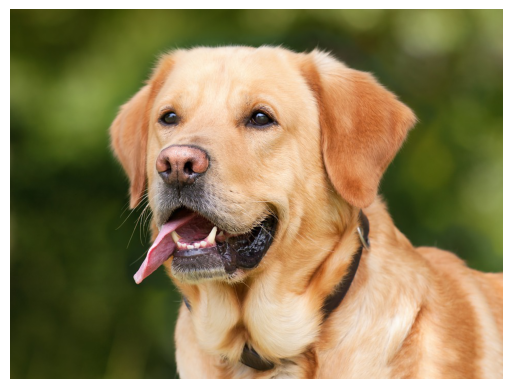

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
dog


In [17]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

test_image_path = 'C:/dataset/dataset/single_prediction/cat_or_dog_1.jpg'
test_image = load_img(test_image_path, target_size=(64, 64))
test_image_array = img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

plt.imshow(load_img(test_image_path))
plt.axis('off')
plt.show()

result = cnn.predict(test_image_array)

training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)